In [46]:
### IMPORTS ###

import struct
import numpy as np
import matplotlib.pyplot as plt

In [47]:
### SETTINGS ###

np.set_printoptions(precision=3, suppress=True, threshold=np.inf)

In [48]:
### FUNCTIONS ###
def u_analytical_poisson_2d(global_domain_begin, global_indices, dx):
    point = global_domain_begin + (np.array(global_indices) - 1) * np.array(dx)
    func_val = np.prod(np.sin(np.pi * point))
    return func_val

In [49]:
block_size = 128
domain_begin = np.array([0.0, 0.0])
domain_end = np.array([1.0, 1.0])

In [50]:
file_path = '../output/system_solution.dat'  # Replace with your actual file path
format_string = '>d'  # '<d' for little-endian, '>d' for big-endian
record_size = struct.calcsize(format_string)
data = []

with open(file_path, 'rb') as file:
    while True:
        record_bytes = file.read(record_size)
        if not record_bytes:
            break  # End of file

        # Skip incomplete records
        if len(record_bytes) != record_size:
            print("Warning: Incomplete record skipped.")
            continue

        try:
            record = struct.unpack(format_string, record_bytes)
            data.append(record[0])
        except struct.error as e:
            print(f"Error unpacking record: {e}")
            # Handle or log the error as needed

# Reshape the data into a 2D array
data = np.array(data)
data = data.reshape(block_size, block_size)


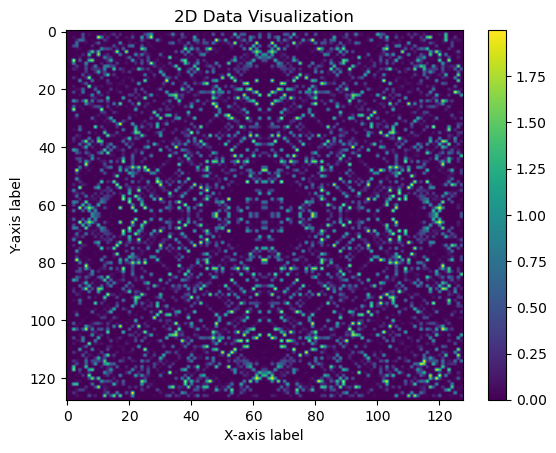

In [51]:
# Assuming 'data' is your 2D numpy array
plt.imshow(data, cmap='viridis', aspect='auto')  # 'cmap' sets the colormap, 'aspect' adjusts the aspect ratio
plt.colorbar()  # Adds a colorbar to the side to indicate the scale
plt.title('2D Data Visualization')  # Adds a title to the plot
plt.xlabel('X-axis label')  # Label for the x-axis
plt.ylabel('Y-axis label')  # Label for the y-axis
plt.show()  # Displays the plot

Max error:  1.9625405720357398
Mean error:  0.4177571516778159
Std dev error:  0.34314594224416295


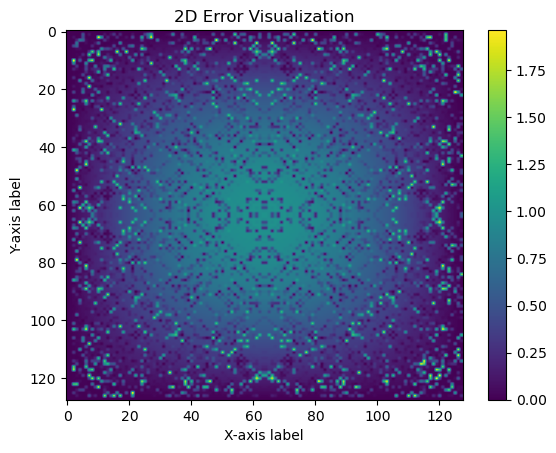

In [52]:
true_solution = np.zeros((block_size, block_size))
dx = abs(domain_end - domain_begin) / (block_size - 1)

for i in range(1, block_size + 1):
    for j in range(1, block_size + 1):
        true_solution[i - 1, j - 1] = u_analytical_poisson_2d(domain_begin, [i, j], dx)

error = np.abs(data - true_solution)
print("Max error: ", np.max(error))
print("Mean error: ", np.mean(error))
print("Std dev error: ", np.std(error))

plt.imshow(error, cmap='viridis', aspect='auto')  # 'cmap' sets the colormap, 'aspect' adjusts the aspect ratio
plt.colorbar()  # Adds a colorbar to the side to indicate the scale
plt.title('2D Error Visualization')  # Adds a title to the plot
plt.xlabel('X-axis label')  # Label for the x-axis
plt.ylabel('Y-axis label')  # Label for the y-axis
plt.show()  # Displays the plot
